#How ipython notebooks work

If you have never used an ipython notebook, then here are the few basic rules you need to know:

* each cell is a block of code or comments (in markdown, see pull-down menu above)
* in each cell you can edit code, several lines using the `Return` key to create a newline
* once you are happy with a block of code use the _play_ button above, or just hit `Shift`-`Return` to execute the block of code

#Explore a NuGrid AGB star model in iPython Notebook


## The MESA stellar evolution model
Initialise the 2 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [38]:
s=ms.star_log(mass=2,Z=0.02)

nugrid_path = /home/nugrid/CADC/NuGrid
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


Let's now see what the model looks like by making some Kippenhahn diagrams

<IPython.core.display.Javascript object>


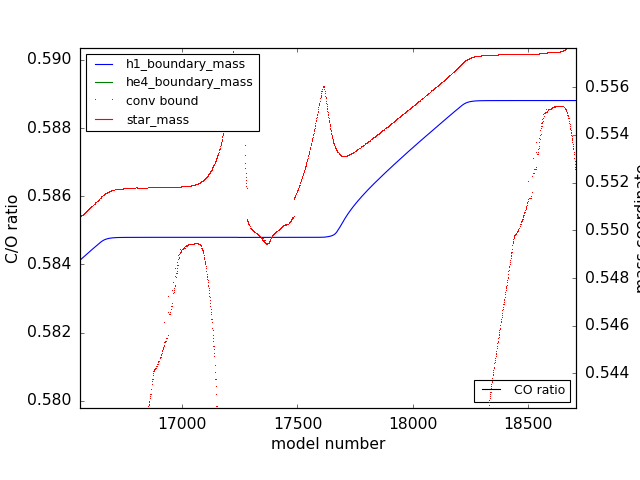

In [39]:
ifig=111;close(ifig);figure(ifig)
s.kippenhahn_CO(111,'model')

What's happening at the centre of the star? ...

<IPython.core.display.Javascript object>


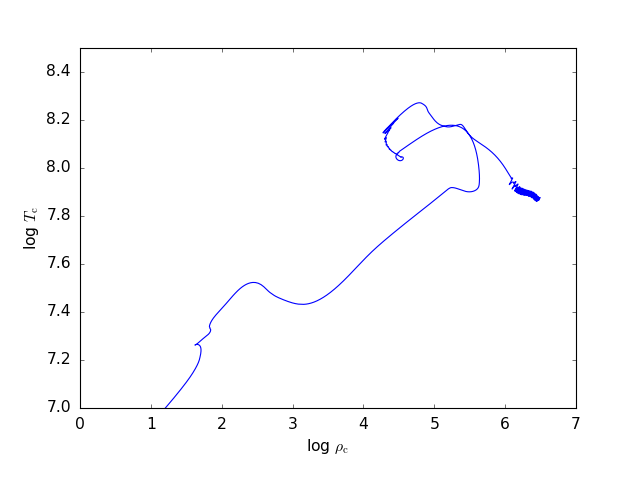

[0, 7, 7, 8.5]

In [29]:
ifig=101;close(ifig);figure(ifig)
s.tcrhoc()
axis([0,7,7,8.5])

... and at the surface?

<IPython.core.display.Javascript object>


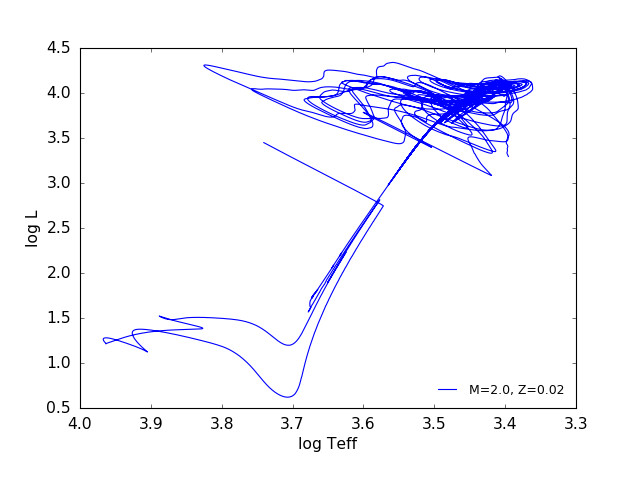

In [28]:
ifig=102;close(ifig);figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)

<IPython.core.display.Javascript object>


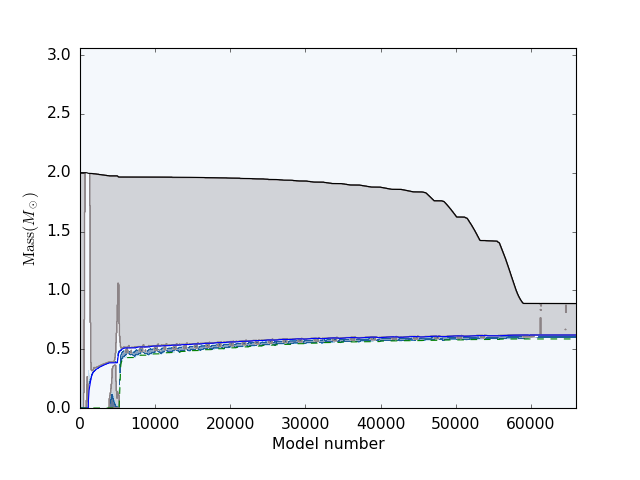

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [31]:
ifig=107;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig)

Now that we have an overview of the stellar evolution of this $2M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 2 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [33]:
pt=mp.se(mass=2,Z=0.02)

nugrid_path = /home/nugrid/CADC/NuGrid
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


### Abundance profiles 

#### A number of isotopes in the H shell 
In the stellar evolution analysis we found that a H-burning shell inbetween thermal pulses could be found at cycle 18000. Let's plot a few isotopes that are being created or destroyed in this H-burning shell:

In [ ]:
pt.abu_profile?

and the nuclides that are being created or destroyed in this part of the star:

In [1]:
species=['H-1','He-4','C-12','C-13','N-14','O-16']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=18000, logy=True)
ylim(-7,0)
xlim(0.552,0.556)

NameError: name 'close' is not defined

#### Abundance profile at the time of formation of the partial-mix zone

In [22]:
species=['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

In [ ]:
ifig=121;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=45500, logy=True, colourblind=True)
ylim(-9,0)
xlim(0.603,0.6033)
title("Formation of the $^\mathsf{13}\mathsf{C}$ pocket: the partial H-$^\mathsf{12}\mathsf{C}$ zone")

In [ ]:
ifig=121;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=47220, logy=True, colourblind=False)
ylim(-9,0)
xlim(0.60312,0.6032)
title("Final s-process formed in $^\mathsf{13}\mathsf{C}$ pocket: end of intershell period")

### Movie of abundance evolution in the C13-pocket
We have found the location and cycle number range of a $^{13}C$-pocket in the stellar evolution analysis. Let's visualize the $^{13}C$-pocket with an animation:

In [20]:
cycs=range(26100,27100,20)

In the region just below the deepest penetration of 3rd dredge-up after a He-shell flash a thin layer of $^{13}{\rm C}$ was produced. There are also $\alpha$-particles in this layer that are being captured by the $^{13}{\rm C}$. Neutrons are released by the reaction $^{13}{\rm C}(\alpha,n)^{16}{\rm O}$ and successive captures of these neutrons by heavier seed nuclei such as iron build the heavy elements, e.g. $^{138}{\rm Ba}$.

Now let's make an abundance-profile movie for the isotopes listed in **`species`** for cycles **`cycs`** so that we can see this happening in the model:

<IPython.core.display.Javascript object>


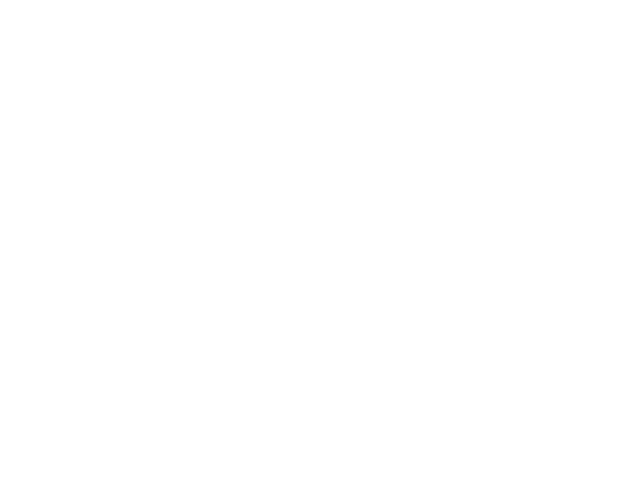

 reading ['mass', 'iso_massf']...100%

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


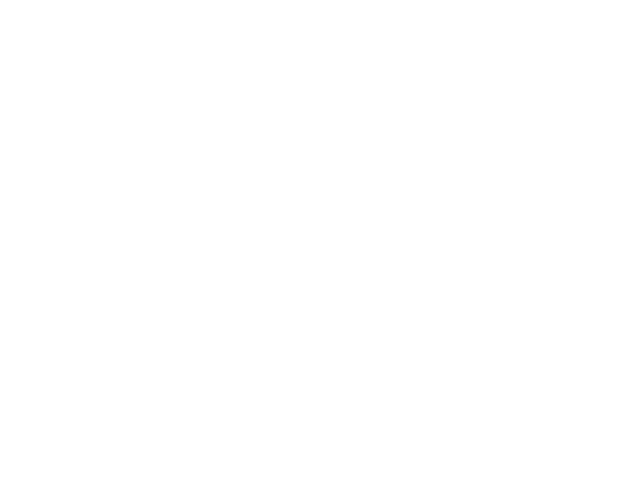


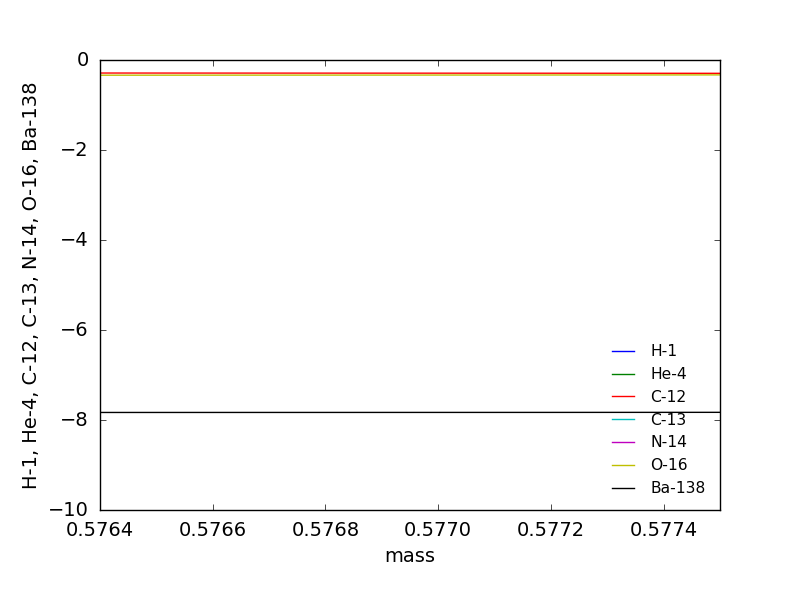
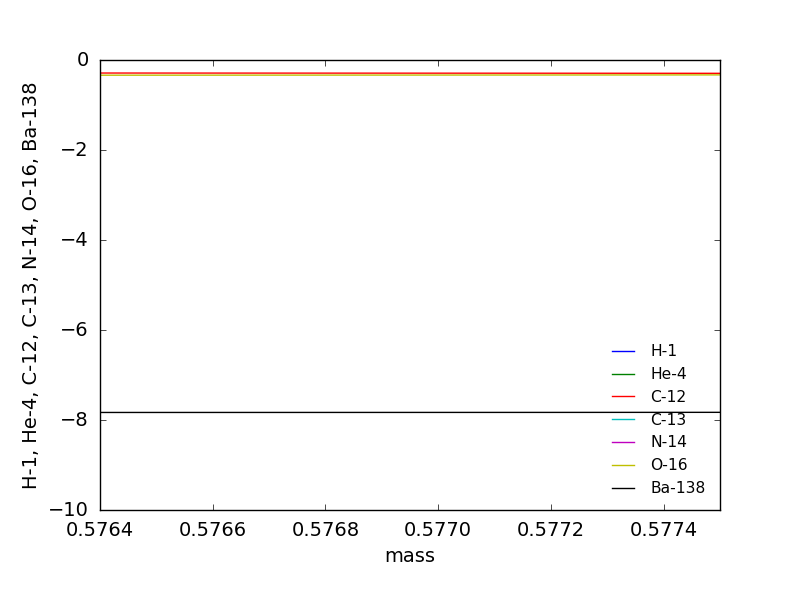
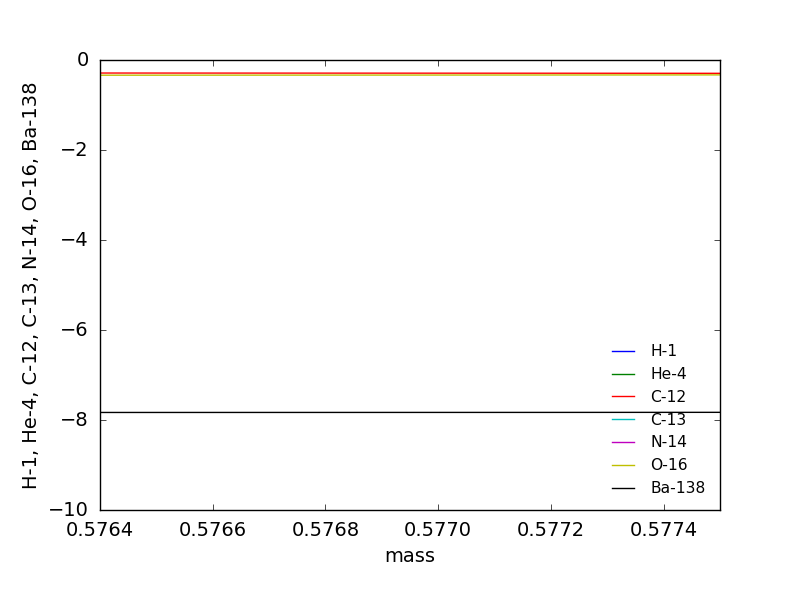
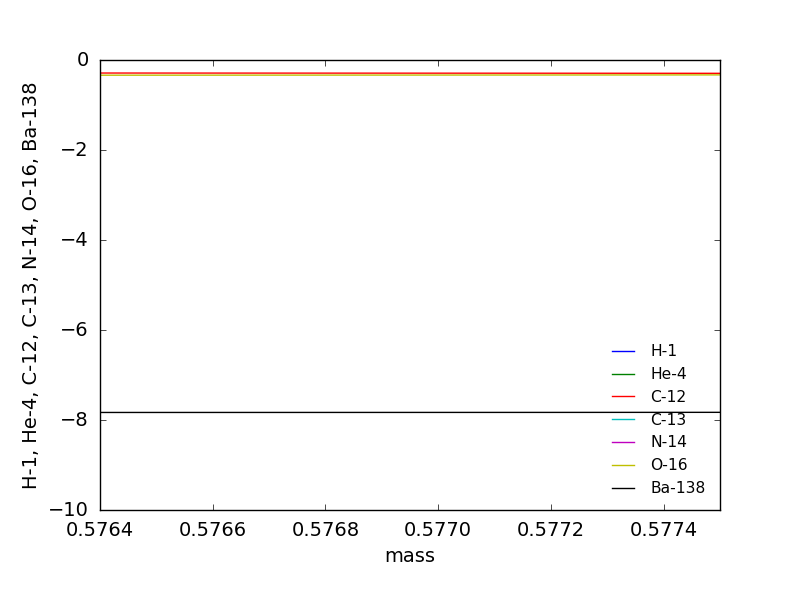
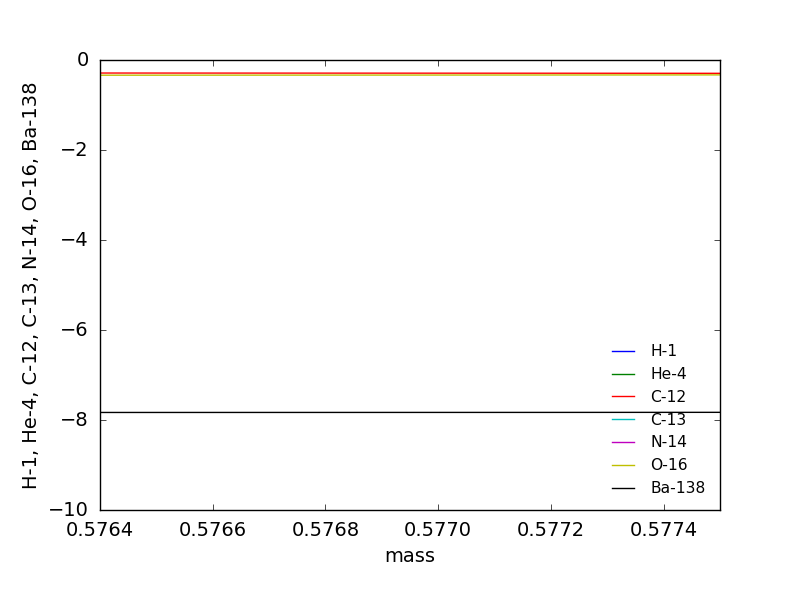
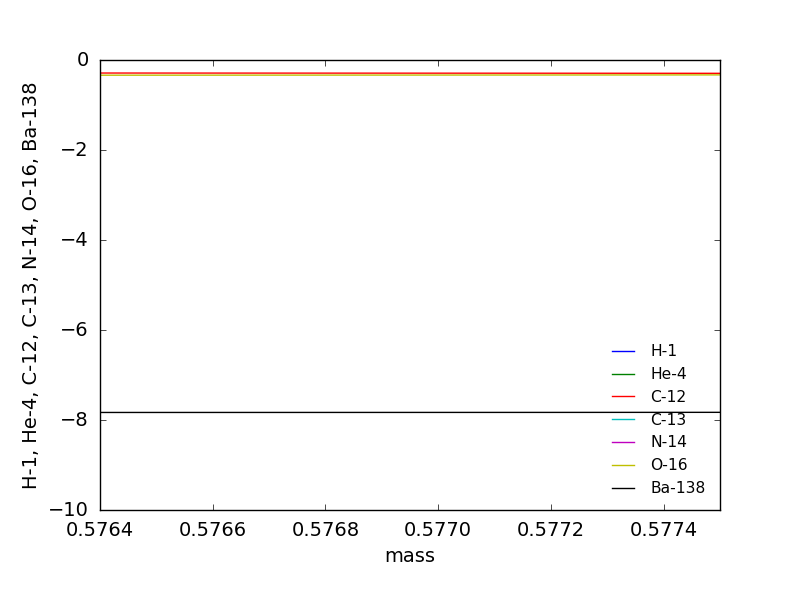
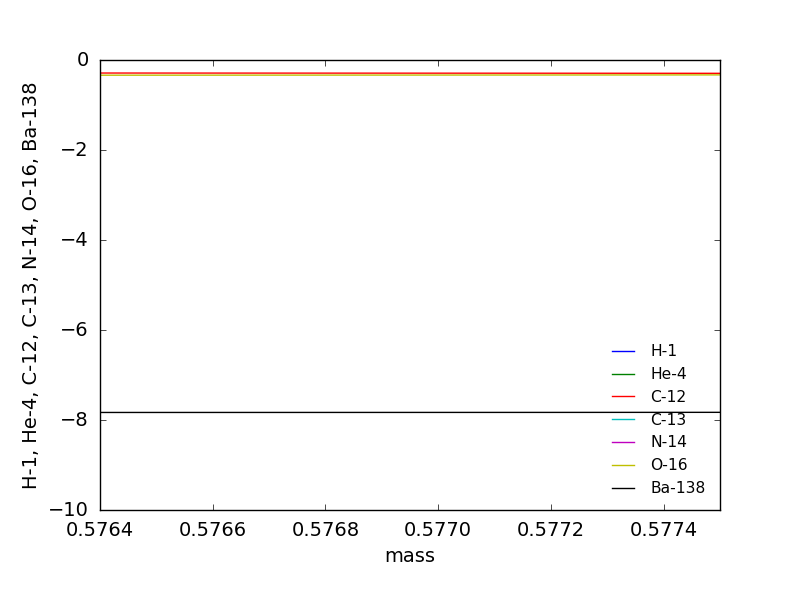
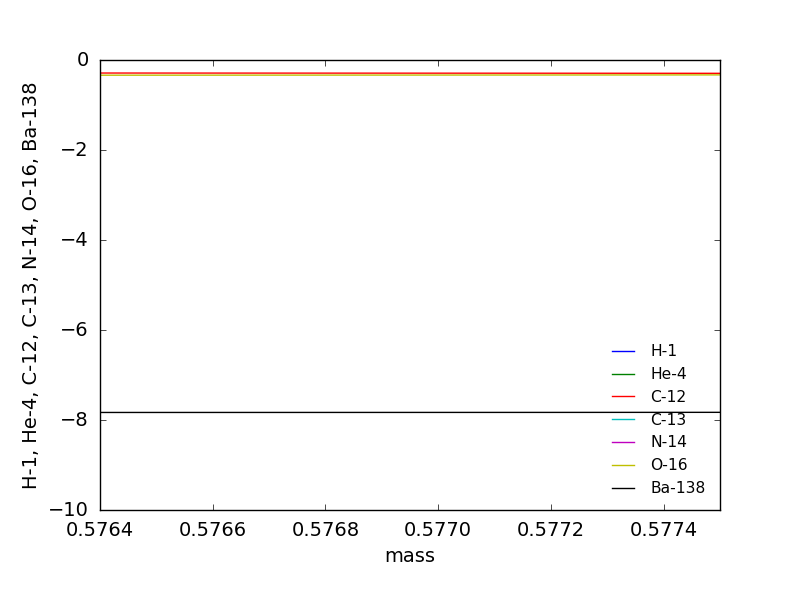
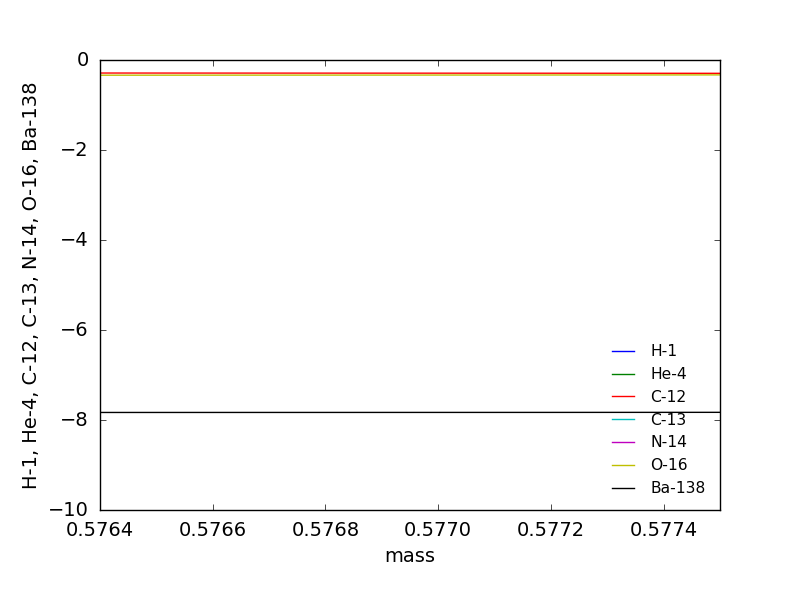
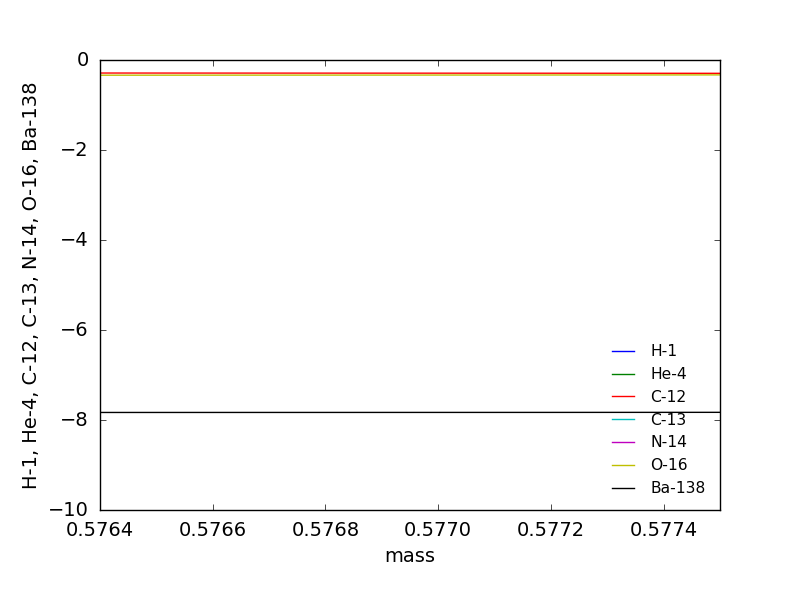
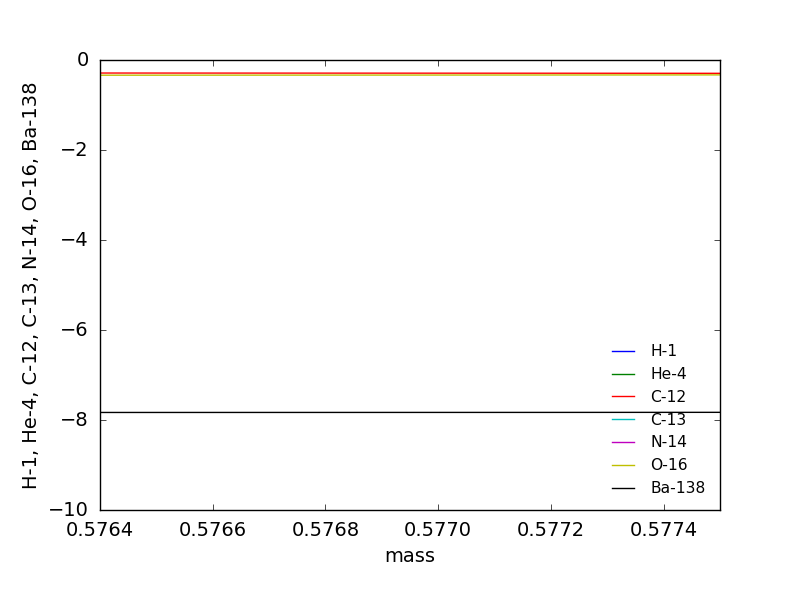
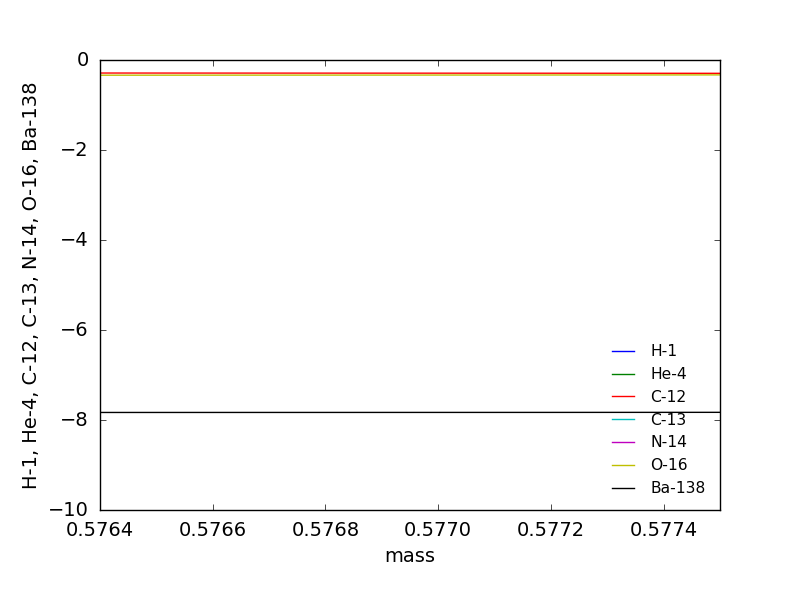
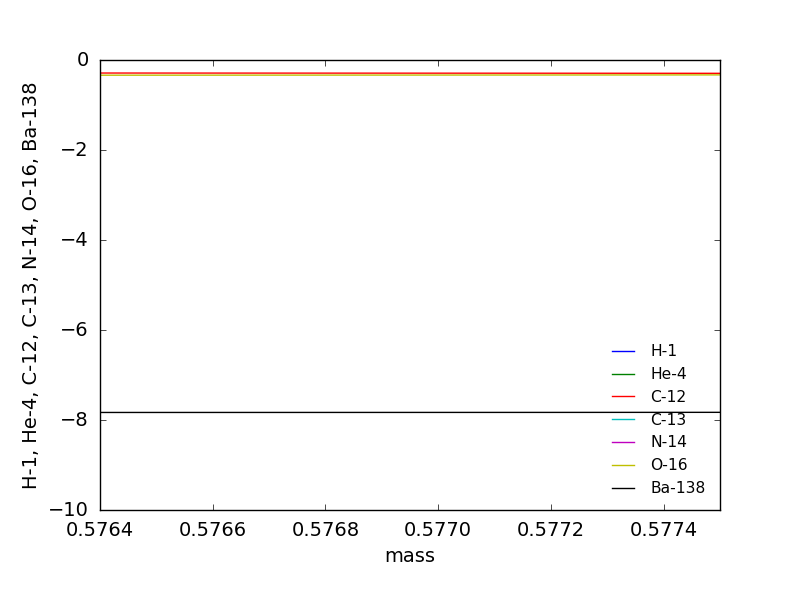
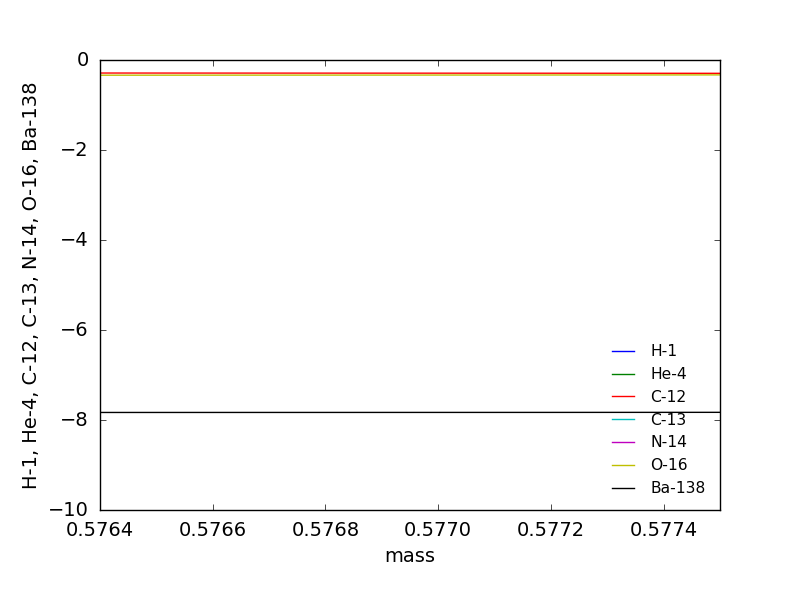
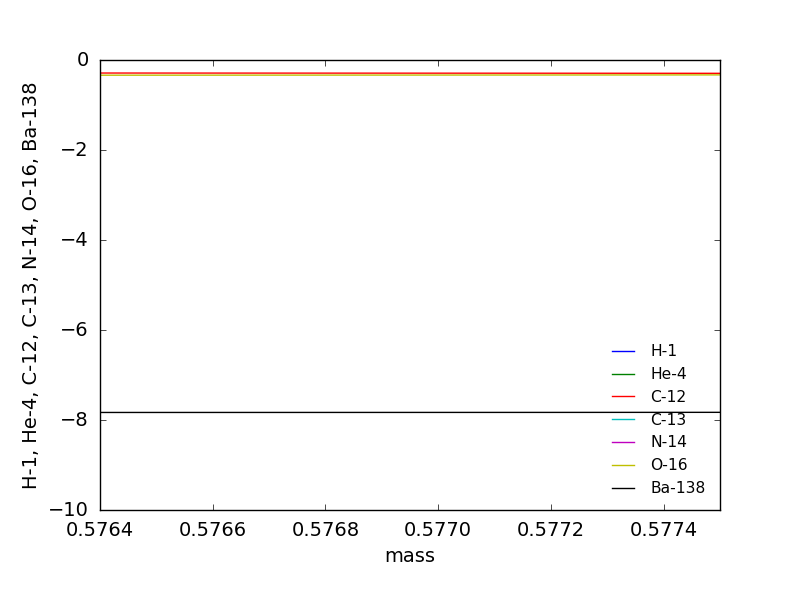
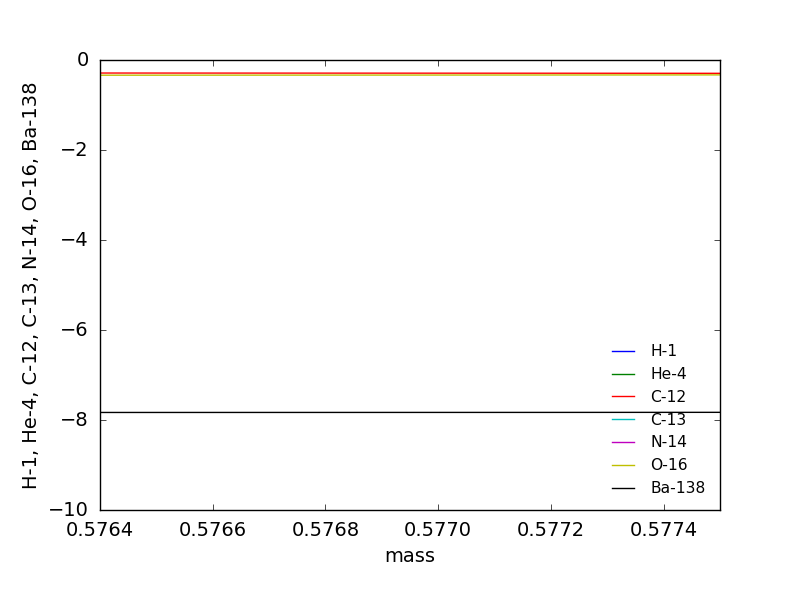
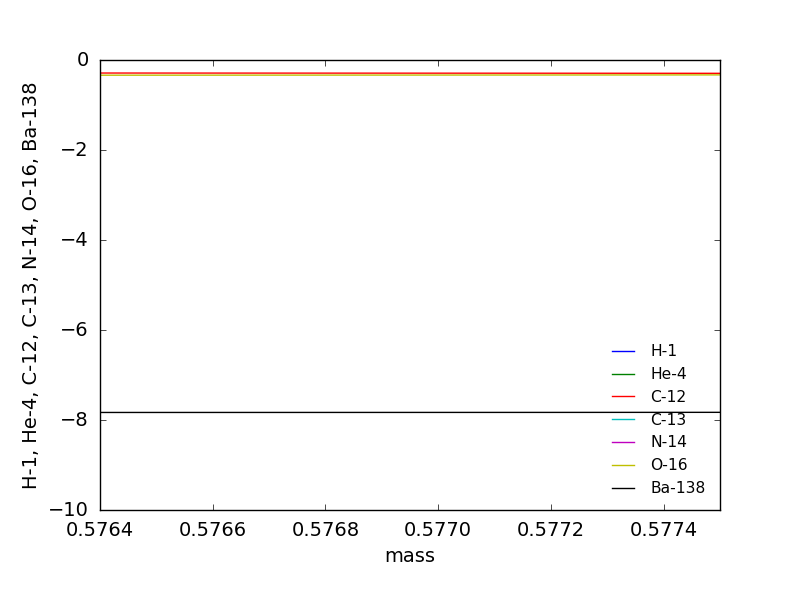
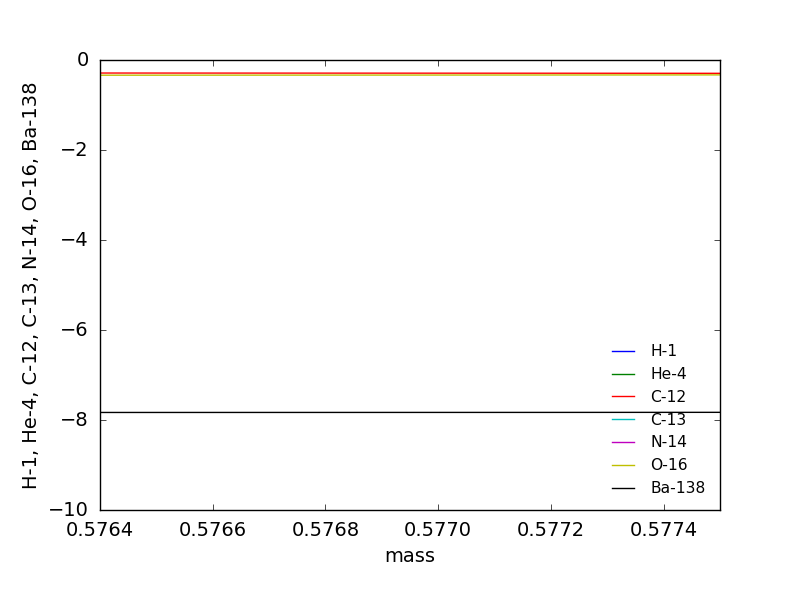
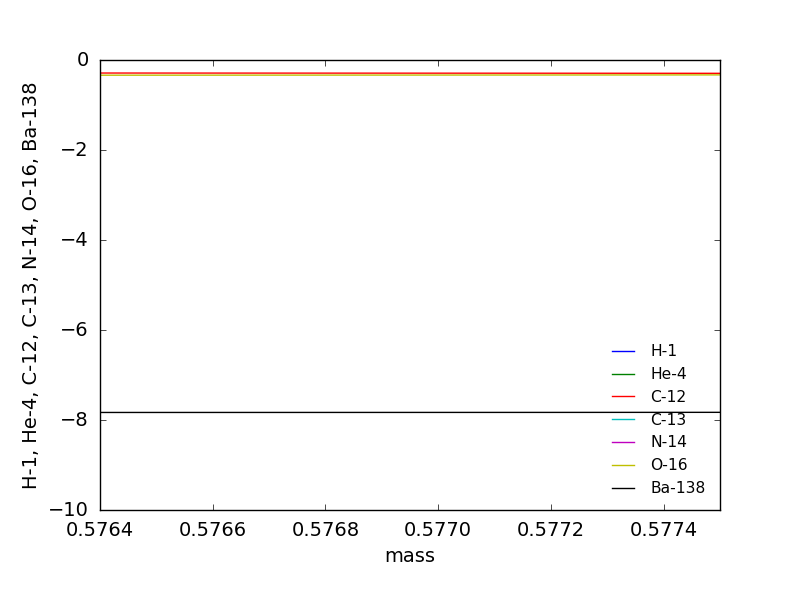
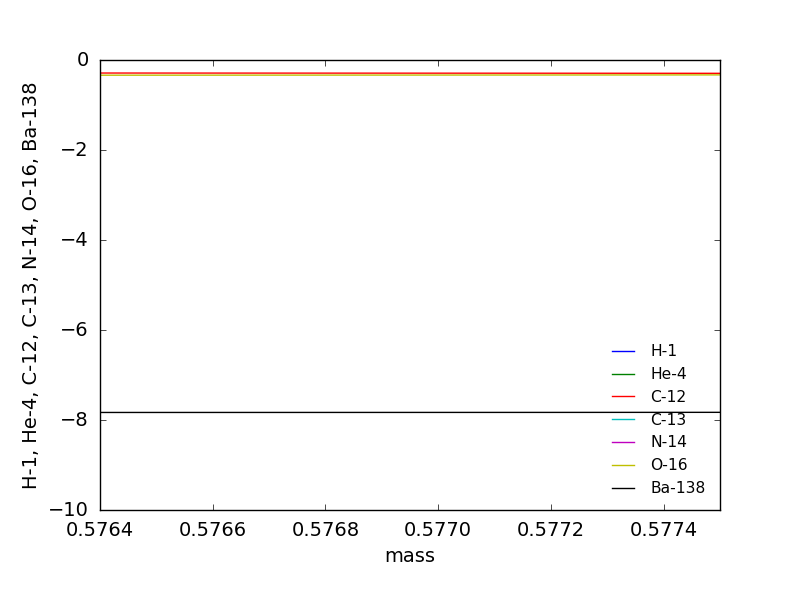
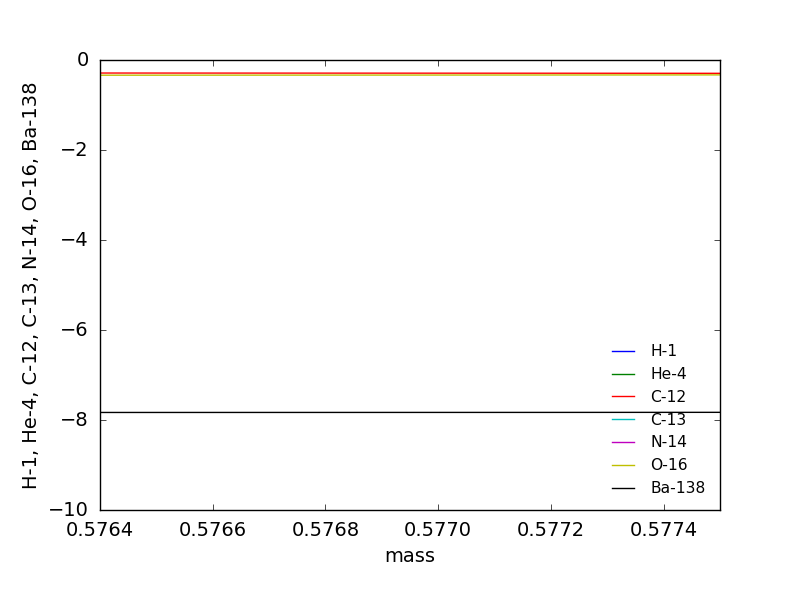
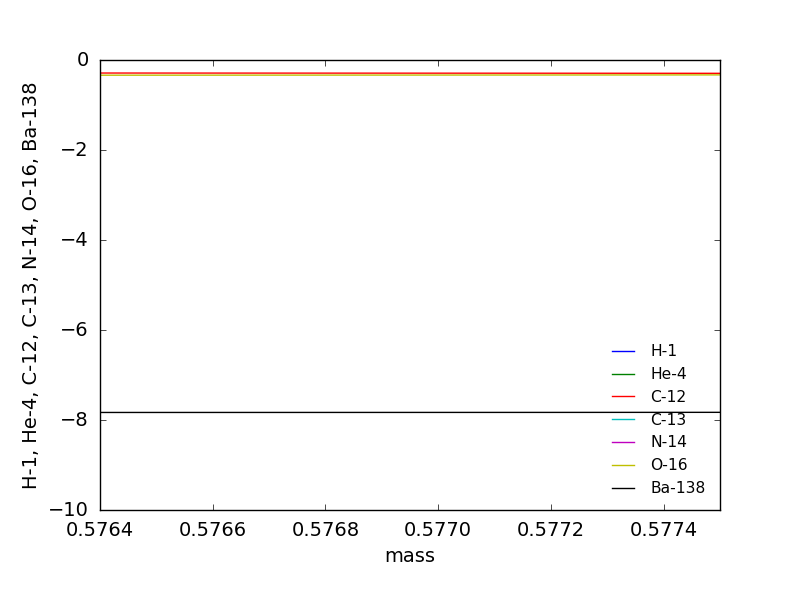
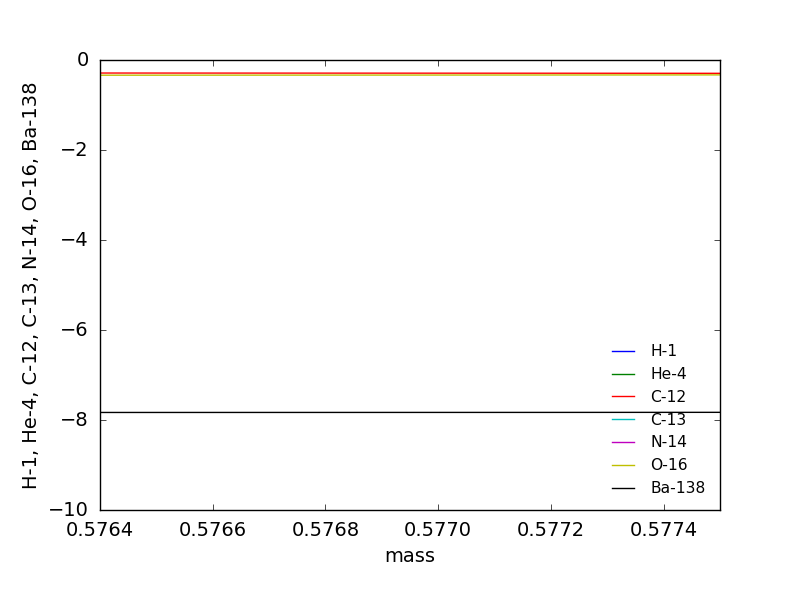
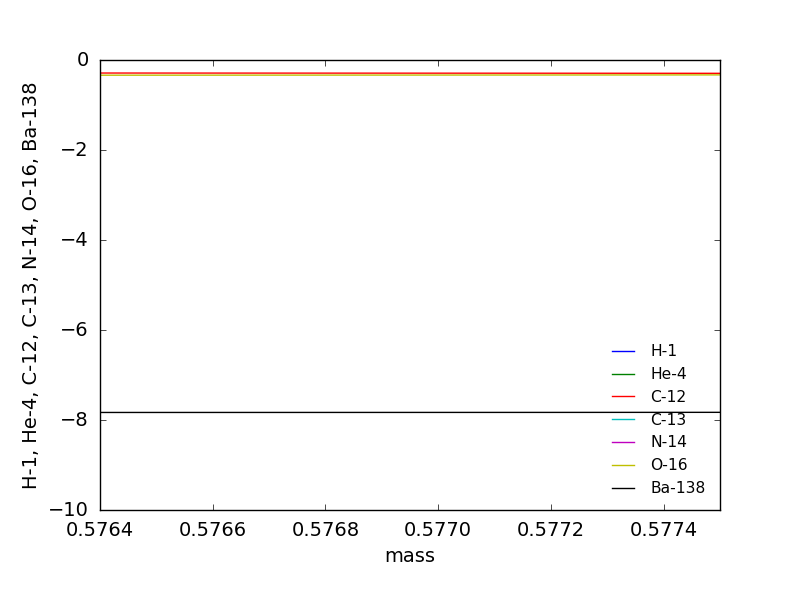
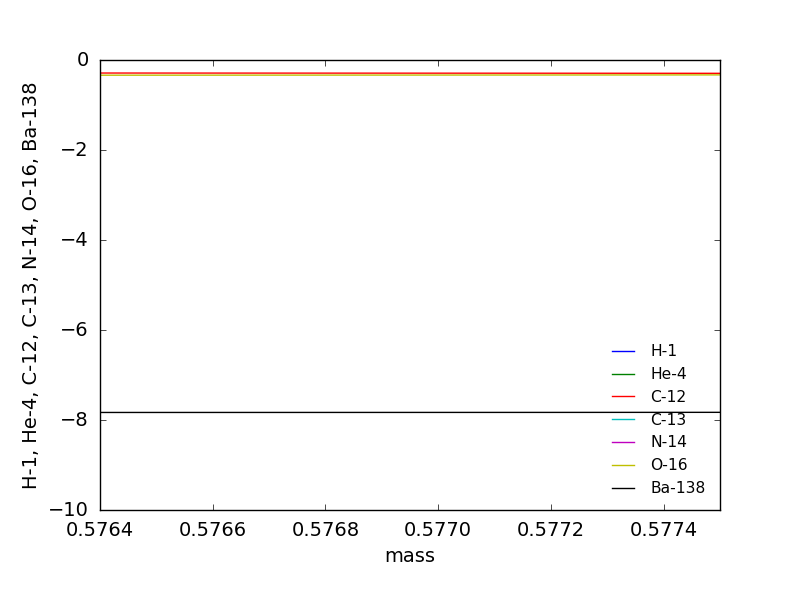
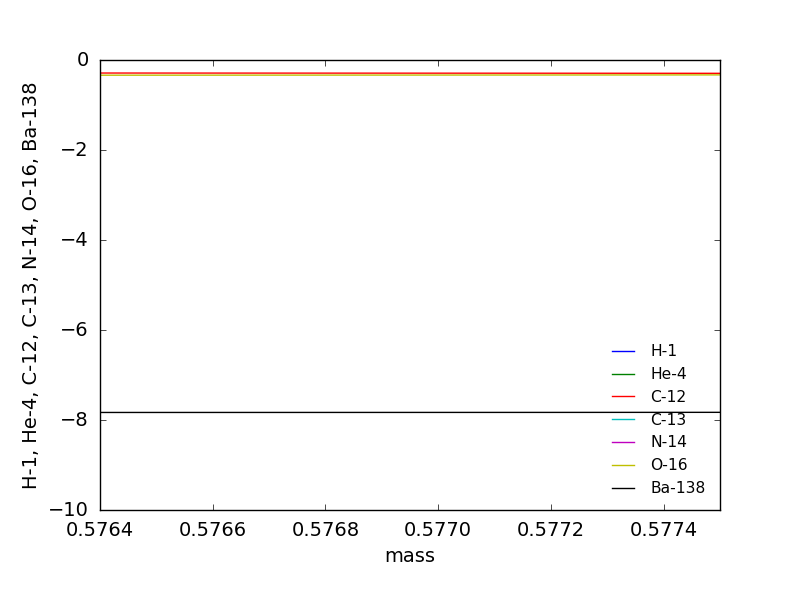
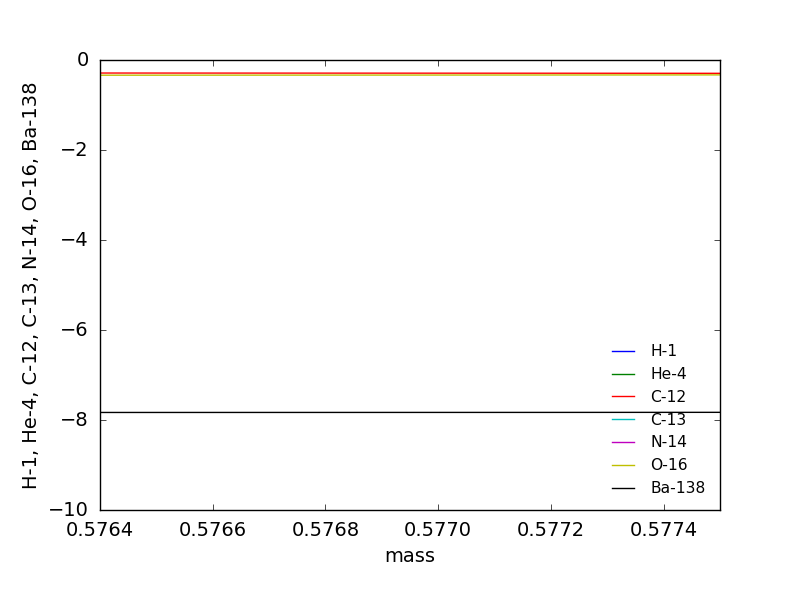
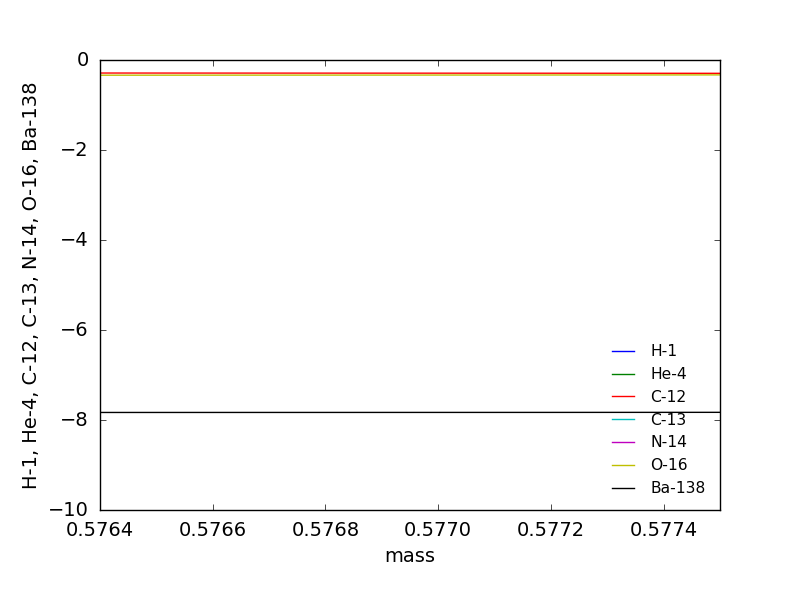
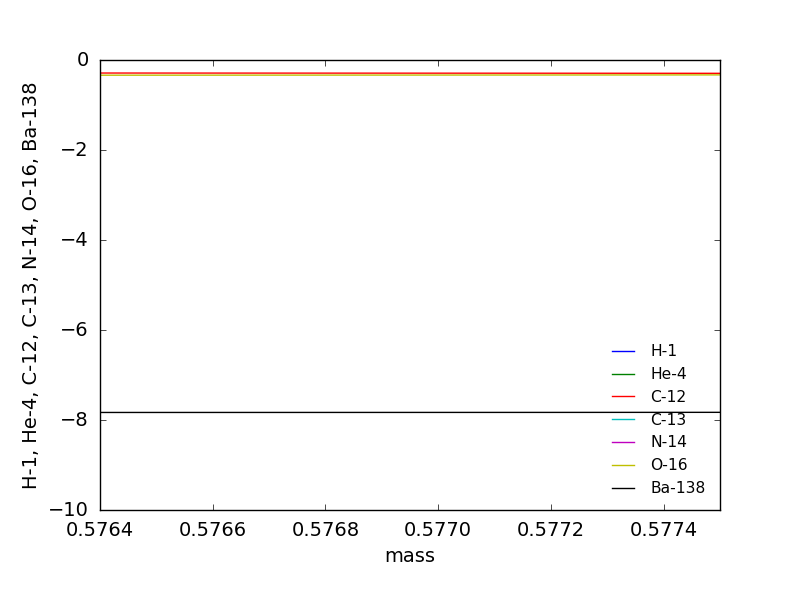
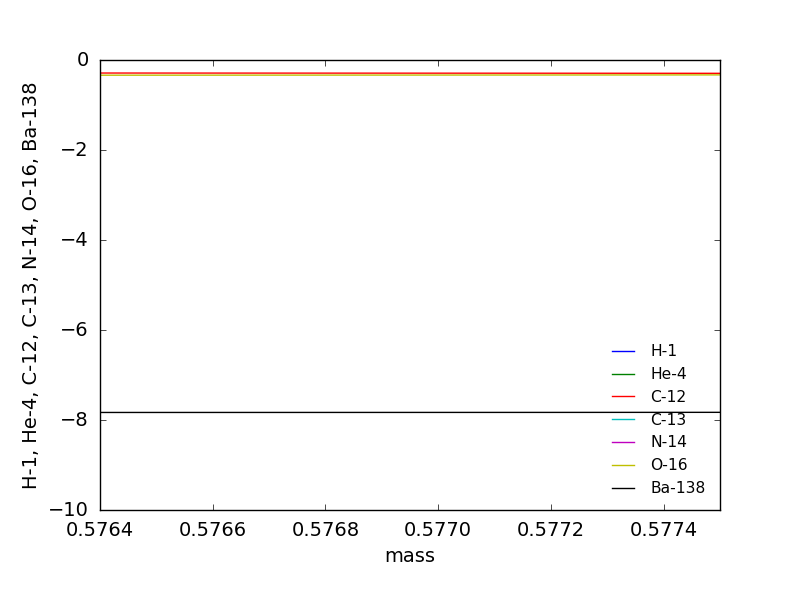
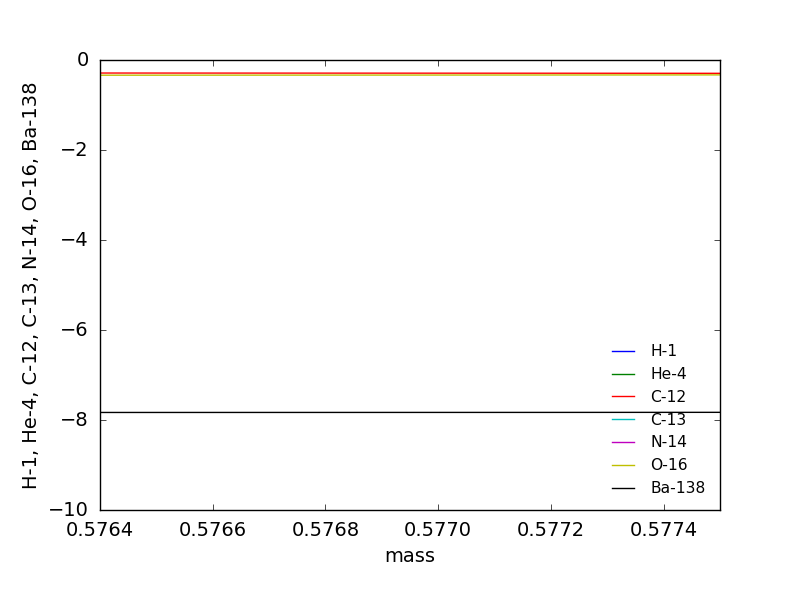
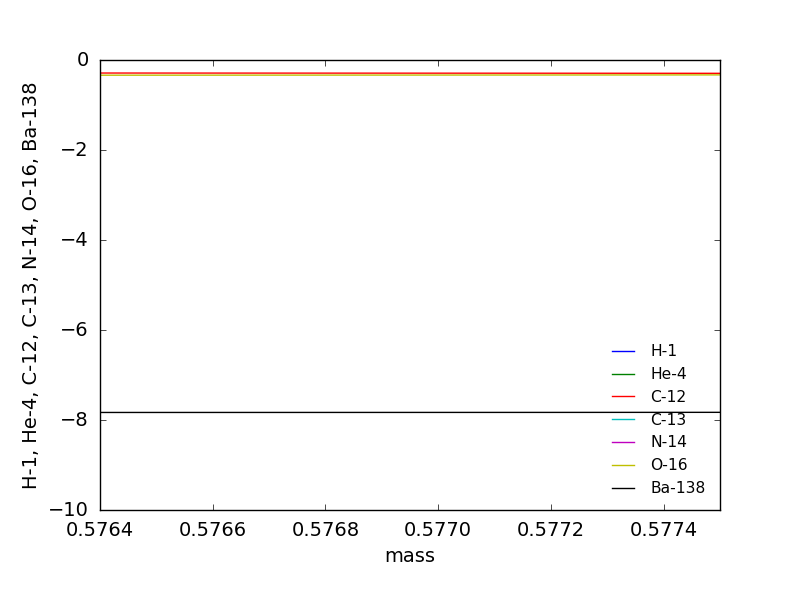
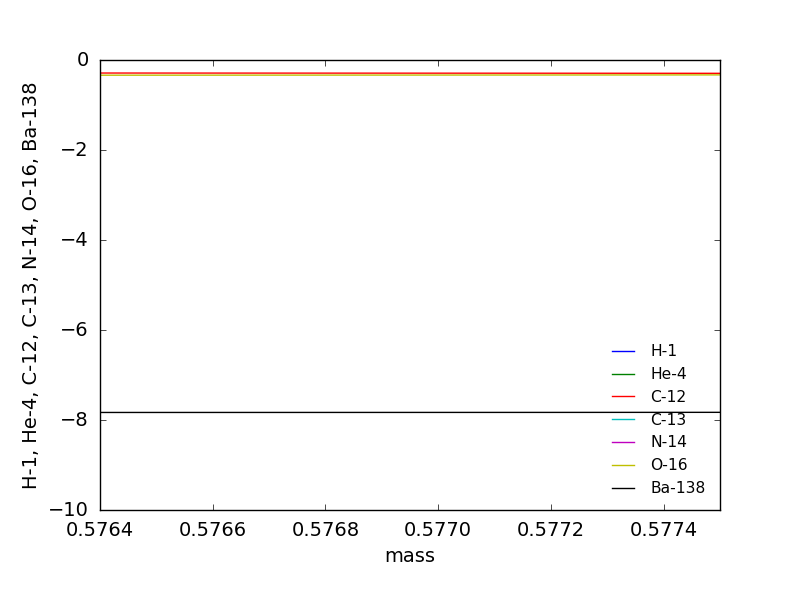
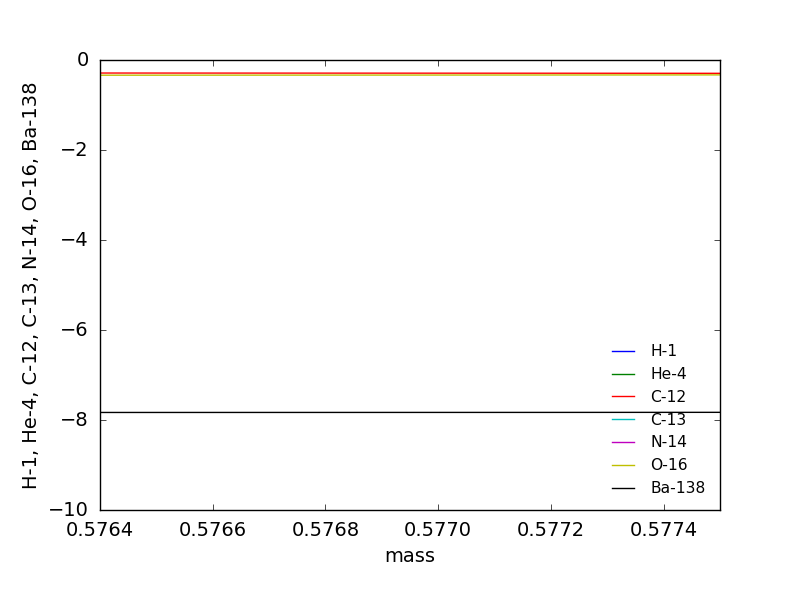
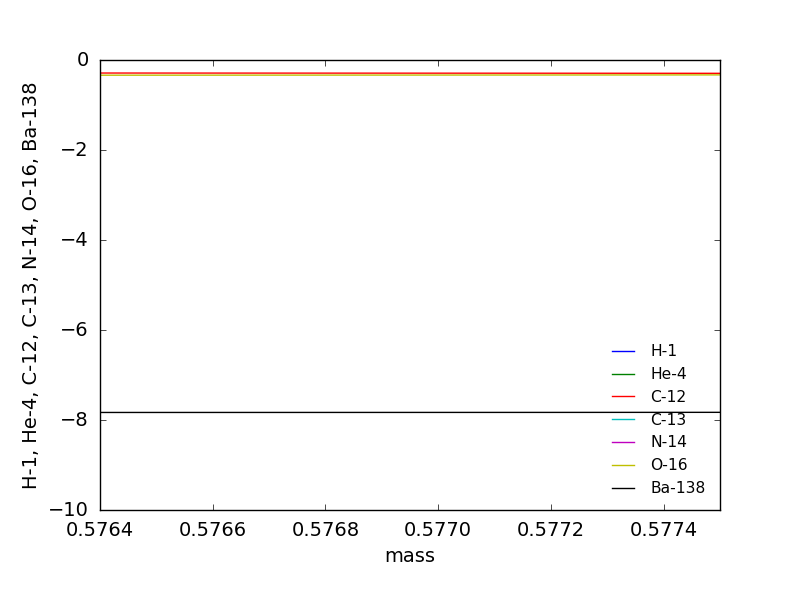
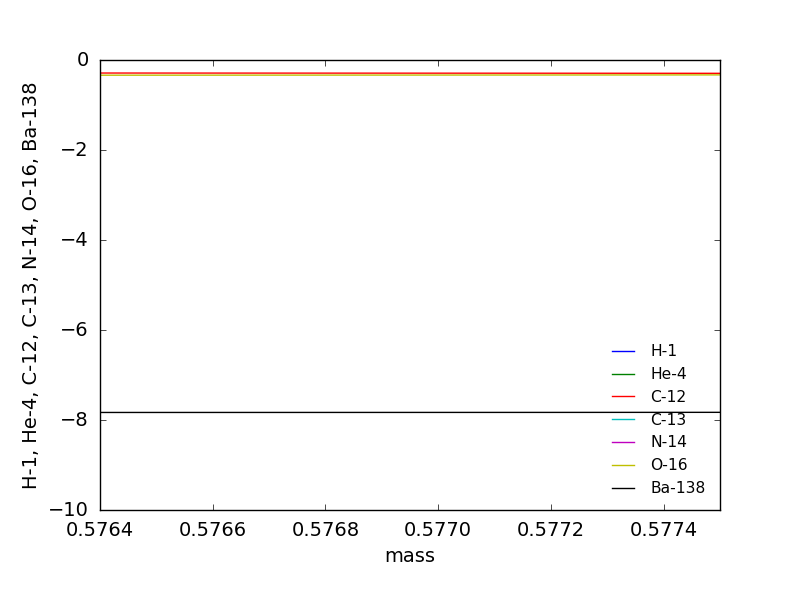
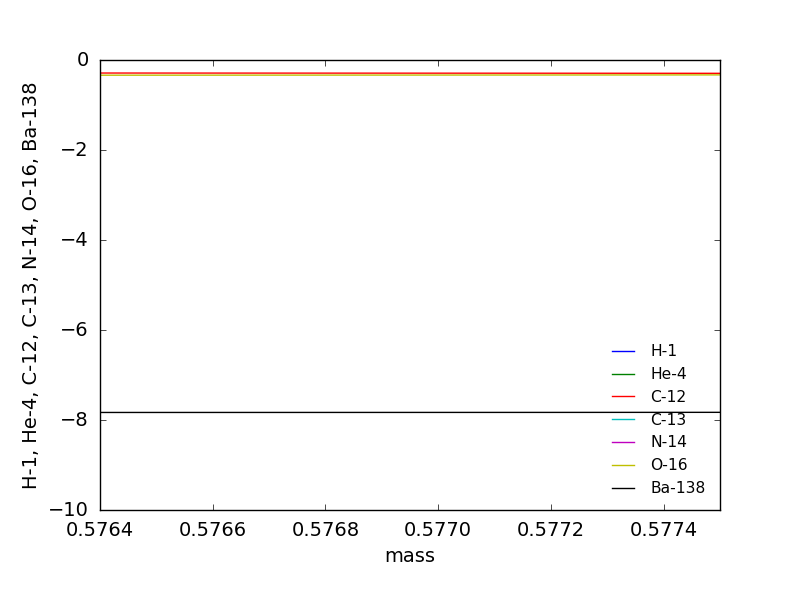
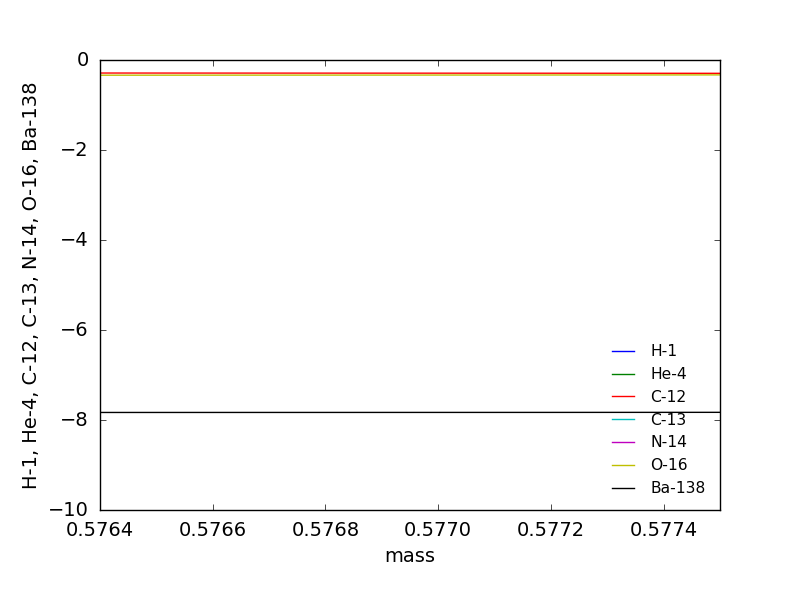
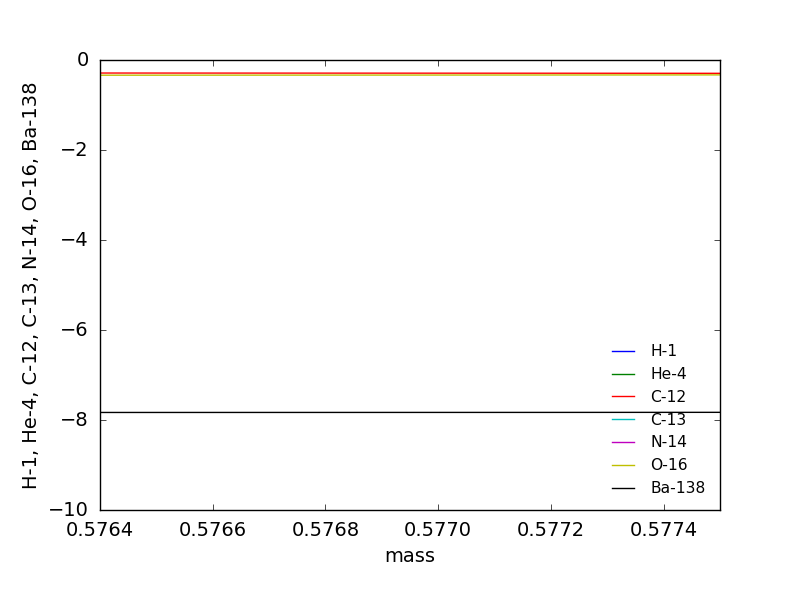
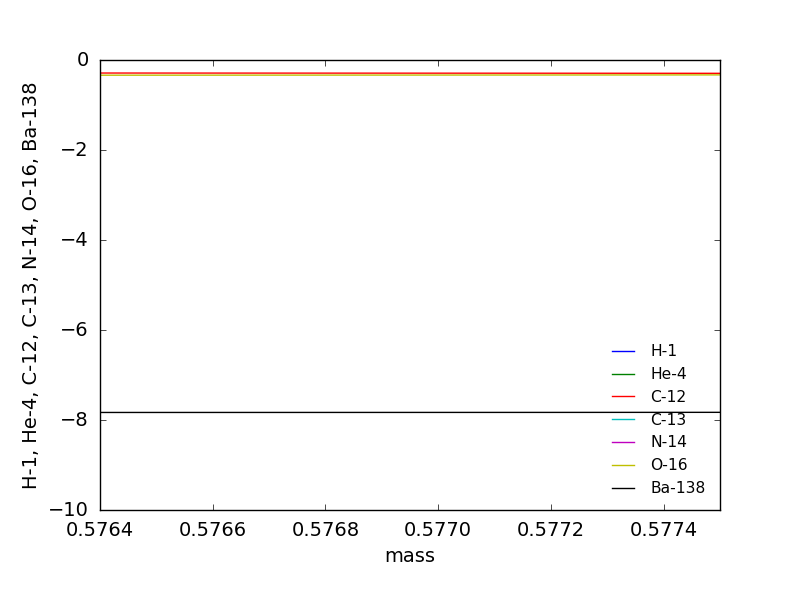
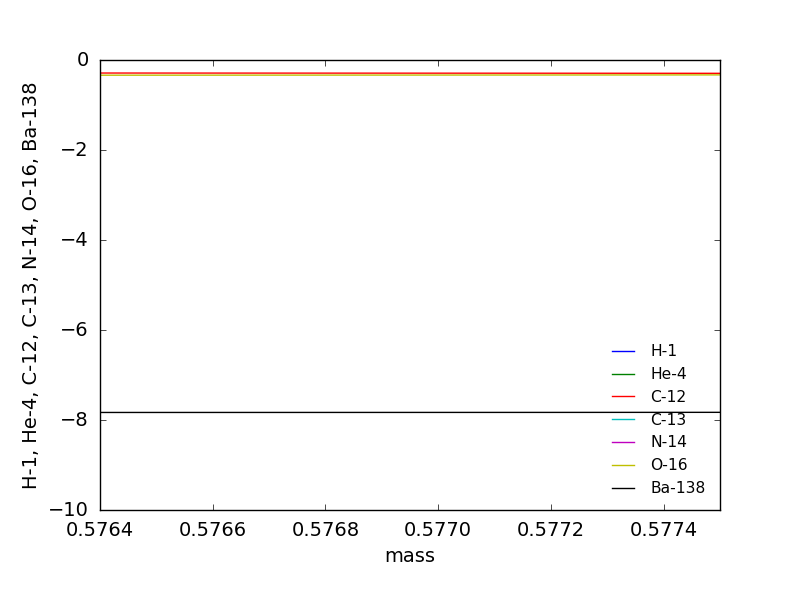
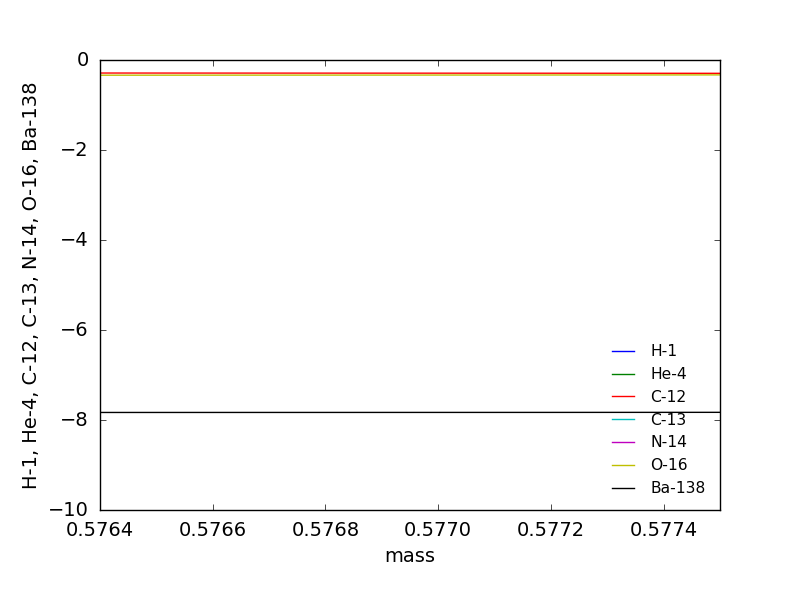
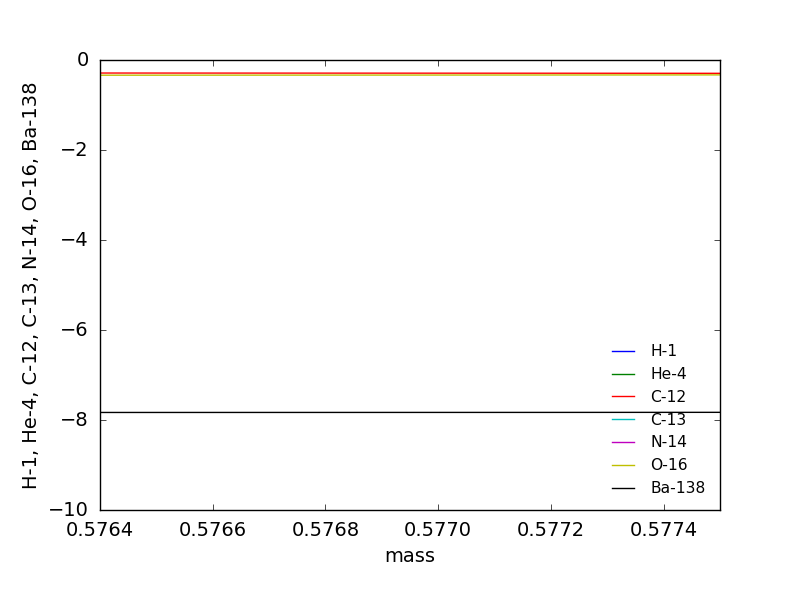
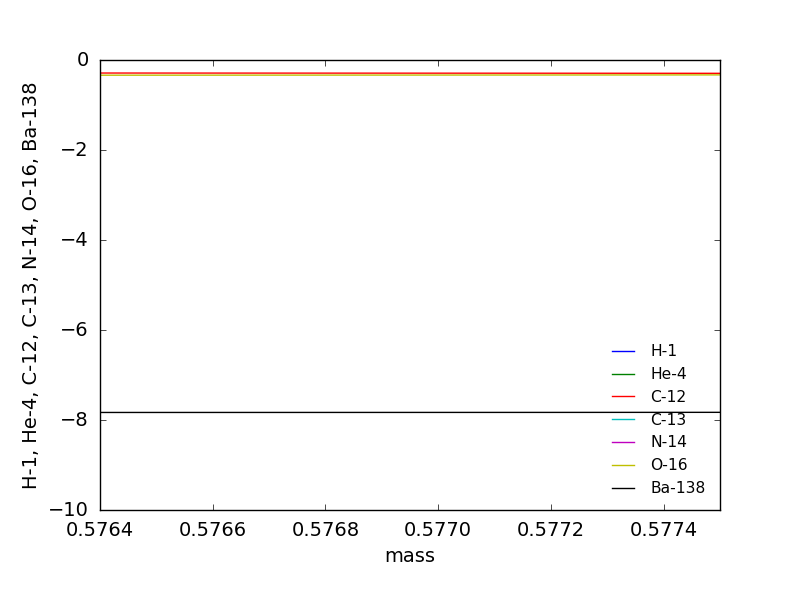
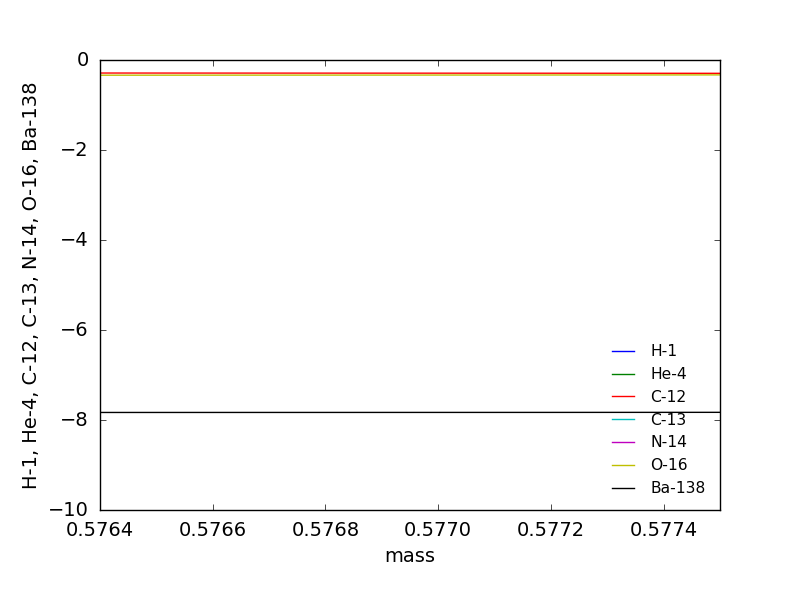
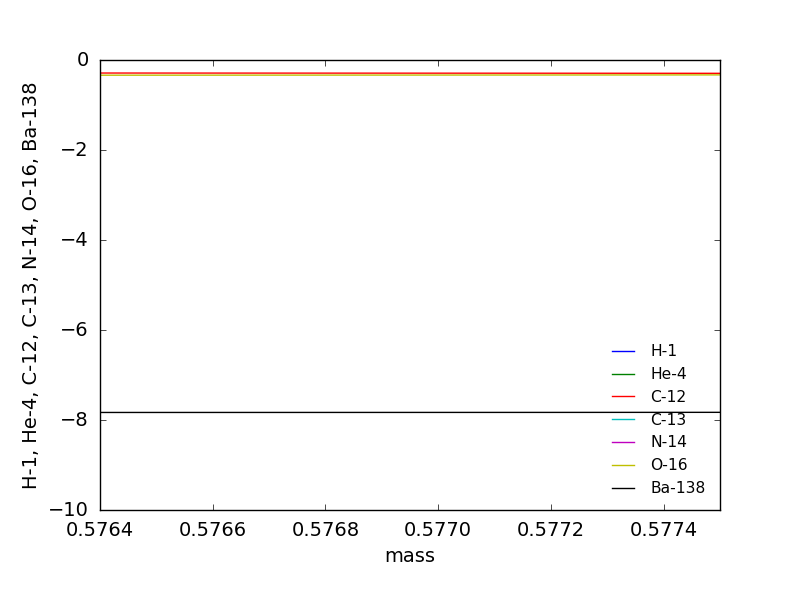
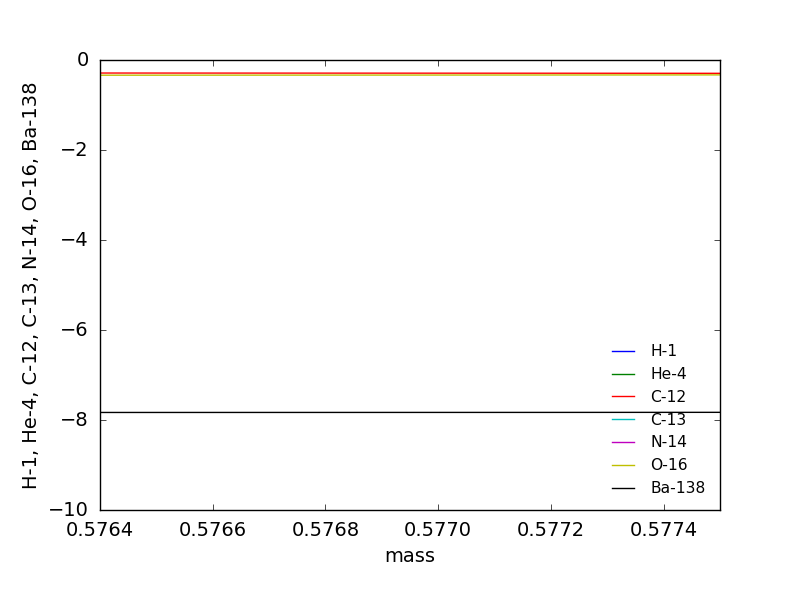
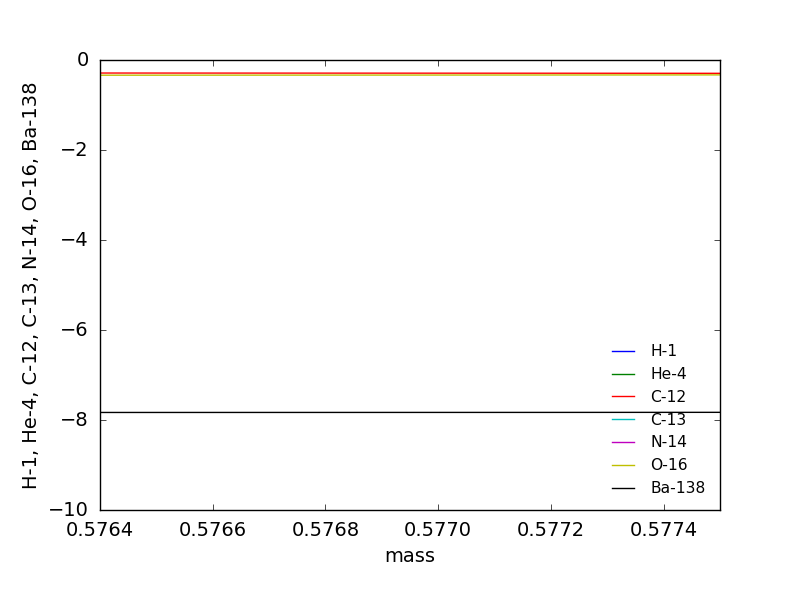
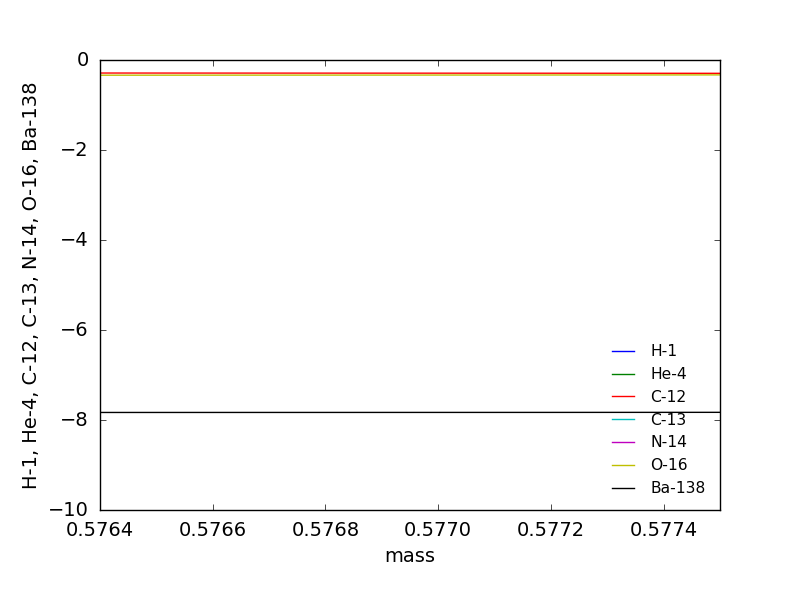
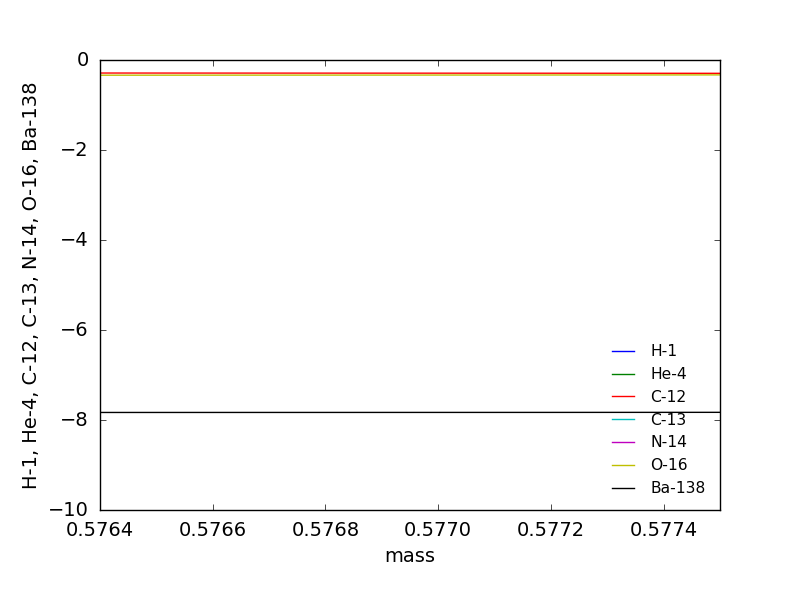

In [23]:
pt.movie(cycs,plotstyle='plot',x_item='mass',
         y_items=species,logy=True,xlims=(0.5764,0.5775),
         ylims=(-10,0.),interval=100,legend=True,loc='lower right')

### Animation of isotopic abundance distribution in the C13 pocket
Here's an iso_abund movie of the main s-process component being produced in the region where Ba-138 is shown to be produced in the abundance profile movie above:

In [ ]:
pt.movie(cycs,plotstyle='iso_abund',
         amass_range=[50,160],mass_range=[0.5768,0.5769])

We can also see the impact on the isotopic abundance chart for that part of the star:

In [ ]:
pt.movie(cycs,plotstyle='abu_chart',
                mass_range=[0.5768,0.5769],plotaxis=[0, 80, 0, 60],
                ilabel=False,imlabel=False,boxstable=False)

You can extract the trajectory and initial abundances from this model at the key mass coordinate for use in a 1-zone PPN simulation in order to study, for example, the impact of a new rate

In [18]:
pt.abund_at_masscoorinate(26100,0.57685,online=True)

AttributeError: se instance has no attribute 'abund_at_masscoorinate'